# PBL_1 - Logistic Regression

## [ Reading the MNIST ]

In [2]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""


def read(dataset="training", path="."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise Exception("dataset must be 'testing' or 'training'")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)


def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot as plt
    import matplotlib as mpl
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    
    plt.show()

In [3]:
training_list = list(read(dataset="training", path=".\dataset"))
test_list = list(read(dataset="testing", path=".\dataset"))

In [4]:
print(len(training_list), len(test_list))

60000 10000


In [5]:
# label : The answer / pixel : The binary data of img
label, pixel = training_list[0]

In [6]:
print("The answer : {}".format(label))  # The answer

The answer : 5


In [7]:
print(pixel)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

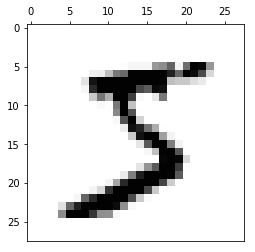

In [8]:
show(pixel)

## [ Analysis using Logistic Regression ]

In [9]:
from sklearn.linear_model import LogisticRegression

# Default Classification
clf_1 = LogisticRegression(C=0.05,
                           multi_class='multinomial',
                           penalty='l1', solver='saga', tol=0.1)


# Flatten 작업
def get_dataset_list(training_list):
    flatted_pixel_list = list()
    label_list = list()

    for i in range(len(training_list)):
        label, pixel = training_list[i]
        flatted_pixel_list.append(np.array(pixel).flatten())
        label_list.append(label)

    return flatted_pixel_list, label_list


In [10]:
# Flatten Training-data-set & Test-data-set
training_flatted_pixel_list, training_label_list = get_dataset_list(training_list)
test_flatted_pixel_list, test_label_list = get_dataset_list(test_list)

In [11]:
# Fitting process
clf_1.fit(training_flatted_pixel_list, training_label_list)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [12]:
score_1 = clf_1.score(test_flatted_pixel_list, test_label_list)
# score() :: test 데이터를 통해 모델을 평가하는 method
# (정확히 분류된 샘플의 비율을 추출)

print("The test score : {}".format(score_1))

The test score : 0.9256


## [ Modifying Parameters ]

In [13]:
"""
C :: 
- C = 1 / lambda
- 가장 accuracy 가 높은 최적의 C 를 찾아야 한다. 
- 일반적으로 C의 값이 작을수록 적합한 모델이 나온다. (그렇다고 너무 작으면 안된다.)

tol ::
- 정지 기준에 대한 허용 오차. 
- 즉, tol 이 작을수록 더 오래걸리지만 정확해진다.
- 여기선 0.1 로 fixed
"""

clf_m = LogisticRegression(C=1.0,
                           multi_class='multinomial',
                           penalty='l1', solver='saga', tol=0.1)

### - Score Values for C ranges of [0.01, 1, 0.05]

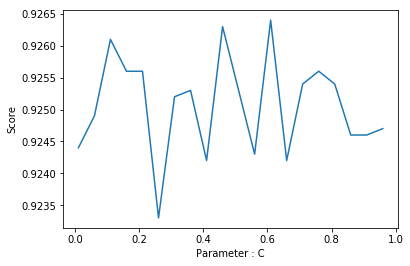

In [22]:
best_values = {"best_c": 0, "best_score": 0}

arr_score = list()
arr_c = np.arange(0.01, 1, 0.05)
for c in range(len(arr_c)):
    clf_m.set_params(C=arr_c[c])
    clf_m.fit(training_flatted_pixel_list, training_label_list)
    score_temp = clf_m.score(test_flatted_pixel_list, test_label_list)
    arr_score.append(score_temp)
    
    if best_values["best_score"] < score_temp:
        best_values["best_c"] = arr_c[c]
        best_values["best_score"] = score_temp

plt.plot(arr_c, arr_score)
plt.xlabel("Parameter : C")
plt.ylabel("Score")
plt.show()

In [23]:
print("The best value of C : {}".format(best_values["best_c"]))
print("The best value of score at the C : {}".format(best_values["best_score"]))

The best value of C : 0.6100000000000001
The best value of score at the C : 0.9264


### - Score values for C ranges of [1, 100, 5]

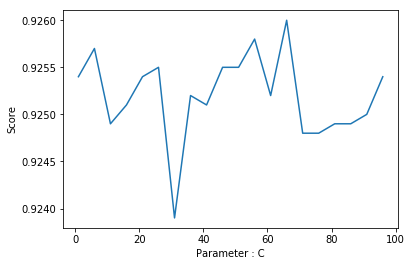

In [32]:
best_values = {"best_c": 0, "best_score": 0}

arr_score = list()
arr_c = np.arange(1, 100, 5)
for c in range(len(arr_c)):
    clf_m.set_params(C=arr_c[c])
    clf_m.fit(training_flatted_pixel_list, training_label_list)
    score_temp = clf_m.score(test_flatted_pixel_list, test_label_list)
    arr_score.append(score_temp)
    
    if best_values["best_score"] < score_temp:
        best_values["best_c"] = arr_c[c]
        best_values["best_score"] = score_temp

plt.plot(arr_c, arr_score)
plt.xlabel("Parameter : C")
plt.ylabel("Score")
plt.show()

In [33]:
print("The best value of C : {}".format(best_values["best_c"]))
print("The best value of score at the C : {}".format(best_values["best_score"]))

The best value of C : 66
The best value of score at the C : 0.926
